In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
pd.set_option('display.max_columns', None)

In [2]:
all_data = pd.read_csv("train/train.csv")
all_data['quarter_number'] = all_data['quarter'].str[-1]

In [3]:
rename_list = [('АДЫГЕЯ РЕСП', 'АДЫГЕЯ РЕСП.'),
 ('АЛТАЙСКИЙ КРАЙ.', 'АЛТАЙСКИЙ КРАЙ', 'АЛТАЙСКИЙ'),
 ('АЛЬШЕЕВСКИЙ Р-Н', 'АЛЬШЕЕВСКИЙ'),
 ('АРХАНГЕЛЬСКАЯ ОБЛ.', 'АРХАНГЕЛЬСКАЯ', 'АРХАНГЕЛЬСКИЙ', 'АРХАНГЕЛЬСКАЯ ОБЛ'),
 ('АУРГАЗИНСКИЙ', 'АУРГАЗИНСКИЙ Р-Н'),
 ('БАШКОРТОСТАН РЕСП.',
  'БАШКОРТОСТАН',
  'БАШКОРТОСТАН РЕСП',
  'РЕСП БАШКОРТОСТАН'),
 ('БЕЛАРУСЬ, МИНСКАЯ ОБЛ',
  'БЕЛАРУСЬ РЕСП',
  'БЕЛАРУСЬ РЕСП.',
  'БЕЛАРУСЬ'),
 ('БЕЛГОРОДСКАЯ', 'БЕЛГОРОДСКИЙ', 'БЕЛГОРОДСКАЯ ОБЛ'),
 ('БЕЛЕБЕЕВСКИЙ Р-Н', 'БЕЛЕБЕЕВСКИЙ'),
 ('БЕЛОРЕЦКИЙ', 'БЕЛОРЕЦКИЙ Р-Н'),
 ('БИЖБУЛЯКСКИЙ', 'БИЖБУЛЯКСКИЙ Р-Н'),
 ('БРЕСТСКАЯ ОБЛ', 'БРЕСТСКИЙ'),
 ('БРЯНСКАЯ', 'БРЯНСКАЯ ОБЛ', 'БРЯНСКАЯ ОБЛ.'),
 ('БРЯНСКАЯ ОБЛ', 'БРЯНСКАЯ ОБЛ.'),
 ('ВАСИЛЕОСТРОВСКИЙ', 'ЛОСИНООСТРОВСКИЙ'),
  ('ВОЛГОГРАДСКАЯ ОБЛ.', 'ВОЛГОГРАДСКАЯ ОБЛ', 'ВОЛГОГРАДСКАЯ'),
 ('ВОЛОГОДСКАЯ ОБЛ', 'ВОЛОГОДСКАЯ'),
 ('ВОРОНЕЖСКАЯ ОБЛ', 'ВОРОНЕЖСКАЯ'),
 ('Г МОСКВА', 'МОСКВА'),
 ('ГОМЕЛЬСКАЯ ОБЛ',
  'БЕЛАРУСЬ, ГОМЕЛЬСКАЯ ОБЛ',
  'ГОМЕЛЬСКАЯ ОБЛАСТЬ',
  'ГОМЕЛЬСКИЙ'),
 ('ДАВЛЕКАНОВСКИЙ Р-Н', 'ДАВЛЕКАНОВСКИЙ'),
 ('ДАГЕСТАН РЕСП', 'ДАГЕСТАН'),
 ('ДОНЕЦКАЯ НАРОДНАЯ РЕСП', 'ДОНЕЦКАЯ НАРОДНАЯ РЕСП.'),
 ('ДЮРТЮЛИНСКИЙ', 'ДЮРТЮЛИНСКИЙ Р-Н', 'ДЮРТЮЛИНСКИЙ РАЙОН'),
 ('ЕРМЕКЕЕВСКИЙ РАЙОН', 'ЕРМЕКЕЕВСКИЙ'),
 ('ЗАБАЙКАЛЬСКИЙ', 'ЗАБАЙКАЛЬСКИЙ КРАЙ.', 'ЗАБАЙКАЛЬСКИЙ КРАЙ'),
 ('ЗИАНЧУРИНСКИЙ', 'ЗИАНЧУРИНСКИЙ Р-Н'),
 ('ИВАНО-ФРАНКОВСКАЯ',
  'УКРАИНА, ИВАНО-ФРАНКОВСКАЯ ОБЛ.',
  'ИВАНО-ФРАНКОВСКАЯ ОБЛ'),
 ('ИГЛИНСКИЙ', 'ИГЛИНСКИЙ Р-Н'),
 ('ИЛИШЕВСКИЙ', 'ИЛИШЕВСКИЙ Р-Н'),
 ('ИНГУШЕТИЯ РЕСП', 'ИНГУШЕТИЯ'),
 ('ИРКУТСКАЯ ОБЛ', 'ИРКУТСКАЯ ОБЛ.'),
 ('ИРКУТСКАЯ ОБЛ', 'ИРКУТСКАЯ ОБЛ.', 'ИРКУТСКАЯ'),
 ('ИСИЛЬКУЛЬСКИЙ', 'ИСИКУЛЬСКИЙ'),
 ('ИШИМБАЙИСКИЙ', 'ИШИМБАЙСКИЙ Р-Н', 'ИШИМБАЙСКИЙ'),
 ('КАЗАХСТАН', 'КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ'),
 ('КАЛИНИНГРАДСКАЯ', 'КАЛИНИНГРАДСКАЯ ОБЛ'),
 ('КАЛТАСИНСКИЙ Р-Н', 'КАЛТАСИНСКИЙ'),
 ('КАМЧАТСКАЯ ОБЛ', 'КАМЧАТСКИЙ КРАЙ'),
 ('КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСП', 'КАРАЧАЕВСКИЙ'),
 ('КАРМАСКАЛИНСКИЙ Р-Н', 'КАРМАСКАЛИНСКИЙ'),
 ('КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС ОБЛ',
  'КЕМЕРОВСКАЯ ОБЛ',
  'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС.',
  'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС'),
 ('КИНЕЛЬ-ЧЕРКАССКИЙ', 'КИНЕЛЬ - ЧЕРКАССКИЙ'),
 ('КИРОВСКАЯ ОБЛ.', 'КИРОВСКАЯ ОБЛ', 'КИРОВСКАЯ', 'КИРОВСКИЙ'),
 ('КОМИ РЕСП.', 'КОМИ РЕСП'),
 ('КРАСНОДАРСКИЙ', 'КРАСНОДАРСКИЙ КРАЙ', 'КРАСНОДАРСКИЙ КРАЙ.'),
 ('КРАСНОКАМСКИЙ', 'КРАСНОКАМСКИЙ Р-Н'),
 ('КРАСНОСЕЛЬКУПСКИЙ', 'КРАСНОСЕЛЬСКИЙ'),
 ('КРАСНОЯРСКИЙ КРАЙ.', 'КРАСНОЯРСКИЙ', 'КРАСНОЯРСКИЙ КРАЙ'),
 ('КУРГАНСКАЯ ОБЛ.', 'КУРГАНСКАЯ ОБЛ', 'КУРГАНСКАЯ'),
 ('КУШНАРЕНКОВСКИЙ', 'КУШНАРЕНКОВСКИЙ Р-Н', 'КУШНАРЕВСКИЙ'),
 ('ЛЕНИНГРАДСКАЯ', 'ЛЕНИНГРАДСКАЯ ОБЛ.', 'ЛЕНИНГРАДСКАЯ ОБЛ'),
 ('ЛИПЕЦКАЯ ОБЛ', 'ЛИПЕЦКАЯ ОБЛ.', 'ЛИПЕЦКАЯ'),
 ('ЛУГАНСКАЯ', 'ЛУГАНСКАЯ НАРОДНАЯ РЕСП.'),
 ('МАРИЙ ЭЛ', 'МАРИЙ ЭЛ РЕСП', 'РЕСП МАРИЙ ЭЛ'),
 ('МЕЛЕУЗОВСКИЙ Р-Н', 'МЕЛЕУЗОВСКИЙ'),
 ('МОГИЛЁВСКАЯ ОБЛАСТЬ',
  'МОГИЛЕВСКАЯ ОБЛАСТЬ'),
 ('МИЯКИНСКИЙ', 'МИЯКИНСКИЙ Р-Н'),
 ('МОСКОВСКИЙ П', 'МОСКОВСКАЯ ОБЛ', 'МОСКОВСКАЯ', 'МОСКОВСКАЯ ОБЛ.'),
 ('НЕФТЕЮГАНСКИЙ Р-Н', 'НЕФТЕЮГАНСКИЙ'),
 ('НИЖЕГОРОДСКАЯ ОБЛ', 'НИЖЕГОРОДСКАЯ ОБЛ.'),
 ('НОВОСИБИРСКАЯ ОБЛ', 'НОВОСИБИРСКАЯ', 'НОВОСИБИРСКАЯ ОБЛ.'),
 ('ОРЕНБУРГСКАЯ', 'ОРЕНБУРГСКАЯ ОБЛ.', 'ОРЕНБУРГСКАЯ ОБЛ'),
 ('ОРЛОВСКАЯ ОБЛ', 'ОРЛОВСКАЯ ОБЛ.'),
 ('ПЕНЗЕНСКАЯ ОБЛ', 'ПЕНЗЕНСКАЯ', 'ПЕНЗЕНСКАЯ ОБЛ.'),
 ('ПЕРМСКИЙ', 'ПЕРМСКИЙ КРАЙ.', 'ПЕРМСКИЙ КРАЙ'),
 ('ПОСЕЛЕНИЕ ВНУКОВСКОЕ', 'П.ВНУКОВСКОЕ', 'ВНУКОВСКОЕ П'),
 ('ПРИМОРСКИЙ Р-Н', 'ПРИМОРСКИЙ', 'ПРИМОРСКИЙ КРАЙ.', 'ПРИМОРСКИЙ КРАЙ'),
 ('РОСТОВСКАЯ ОБЛ', 'РОСТОВСКАЯ'),
 ('РЯЗАНСКАЯ ОБЛ', 'РЯЗАНСКАЯ ОБЛ.', 'РЯЗАНСКАЯ'),
 ('САМАРСКАЯ', 'САМАРСКАЯ ОБЛ', 'САМАРСКАЯ ОБЛ.'),
 ('САНКТ-ПЕТЕРБУРГ Г', 'САНКТ-ПЕТЕРБУРГ', 'Г САНКТ-ПЕТЕРБУРГ'),
 ('САХАЛИНСКАЯ ОБЛ', 'САХАЛИНСКАЯ'),
 ('СВЕРДЛОВСКАЯ ОБЛ.', 'СВЕРДЛОВСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ'),
 ('СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ РЕСП',
  'СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ',
  'РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ',
  'СЕВЕРНАЯ ОСЕТИЯ-АЛАНИЯ РЕСП'),
 ('СОСЕНСКОЕ П', 'СОСЕНСКОЕ'),
 ('СТАВРОПОЛЬСКИЙ', 'СТАВРОПОЛЬСКИЙ КРАЙ', 'СТАВРОПОЛЬСКИЙ КРАЙ.'),
 ('СТЕРЛИБАШЕВСКИЙ', 'СТЕРЛИБАШЕВСКИЙ Р-Н'),
 ('ТАМБОВСКАЯ', 'ТАМБОВСКАЯ ОБЛ'),
 ('ТАТАРСТАН РЕСП', 'ТАТАРСТАН', 'РЕСП ТАТАРСТАН', 'ТАТАРСТАН РЕСП.'),
 ('ТАТЫШЛИНСКИЙ Р-Н', 'ТАТЫШЛИНСКИЙ'),
 ('ТОМСКАЯ', 'ТОМСКАЯ ОБЛ', 'ТОМСКАЯ ОБЛ.'),
 ('ТУЙМАЗИНСКИЙ Р-Н', 'ТУЙМАЗИНСКИЙ'),
 ('ТЮМЕНСКАЯ', 'ТЮМЕНСКАЯ ОБЛ', 'ТЮМЕНСКАЯ ОБЛ.'),
 ('УДМУРТСКАЯ РЕСП.', 'УДМУРТСКАЯ РЕСП', 'УДМУРТСКАЯ'),
 ('УКРАИНА', 'УКРАИНА, ИВАНО-ФРАНКОВСКАЯ ОБЛ.'),
 ('УЛЬЯНОВСКАЯ', 'УЛЬЯНОВСКАЯ ОБЛ', 'УЛЬЯНОВСКАЯ ОБЛ.'),
 ('ХАБАРОВСКИЙ КРАЙ', 'ХАБАРОВСКИЙ КРАЙ.', 'ХАБАРОВСКИЙ'),
 ('ХАКАСИЯ', 'ХАКАСИЯ РЕСП', 'РЕСП ХАКАСИЯ', 'ХАКАСИЯ РЕСП.'),
 ('ХАКАСИЯ РЕСП', 'ХАКАСИЯ РЕСП.'),
 ('ХАНТЫ-МАНСИЙСКИЙ',
  'ХАНТЫ-МАНСИЙСКИЙ-ЮГРА АО',
  'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА',
  'ХАНТЫ-МАНСИЙСКИЙ АО',
  'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ-ЮГРА АО',
  'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ',
  'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ АО',
  'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО.',
  'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО'),
 ('ЧЕЛЯБИНСКАЯ ОБЛ.', 'ЧЕЛЯБИНСКАЯ ОБЛ', 'ЧЕЛЯБИНСКАЯ'),
 ('ЧЕЧЕНСКАЯ РЕСП.', 'ЧЕЧЕНСКАЯ', 'ЧЕЧЕНСКАЯ РЕСП'),
 ('ЧИШМИНСКИЙ', 'ЧИШМИНСКИЙ Р-Н'),
 ('ЧУВАШСКАЯ РЕСП',
  'ЧУВАШСКАЯ РЕСПУБЛИКА -',
  'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ',
  'ЧУВАШСКАЯ РЕСПУБЛИКА ЧУВАШИЯ'),
 ('ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ',
  'НЕНЕЦКИЙ АО',
  'ЯМАЛО-НЕНЕЦКИЙ А.ОКР.',
  'ЯМАЛО-НЕНЕЦКИЙ',
  'ЯМАЛО-НЕНЕЦКИЙ АО.',
  'ЯМАЛО-НЕНЕЦКИЙ АО'),
 ('ЯНАУЛЬСКИЙ', 'ЯНАУЛЬСКИЙ Р-Н')]

In [4]:
npo_checks_data = pd.read_csv("train/cntrbtrs.csv", sep=";")[['npo_accnt_id', 'accnt_pnsn_schm']].rename(columns={'npo_accnt_id': 'npo_account_id'}) # содержит информацию о счетах НПО
all_data = pd.merge(all_data, npo_checks_data, how="left", on=["npo_account_id"])

all_data['accnt_pnsn_schm'] = all_data['accnt_pnsn_schm'].astype(int)

In [5]:
rename_dict = {}
for names in rename_list:
    for name in names[1:]:
        rename_dict[name] = names[0]

In [6]:
rename_dict['МОСКВА Г.'] = 'МОСКВА'
rename_dict['МОСКВА Г'] = 'МОСКВА'
rename_dict['Г МОСКВА'] = 'МОСКВА'
rename_dict['ОКРУГ Г. МОСКВЫ'] = 'МОСКВА'


In [7]:
print(all_data['region'].nunique())
all_data['region'] = all_data['region'].replace(rename_dict)
print(all_data['region'].nunique())

448
286


In [8]:
all_data = all_data[~(all_data['region'].isin(['УКРАИНА', '2 МКР', 'ИВАНО-ФРАНКОВСКАЯ', 
                    'СОЕДИНЕННОЕ КОРОЛЕВСТВО', 'ГЕРМАНИЯ', '-', '77', 'ОБЪЕДИНЕННЫЕ АРАБСКИЕ ЭМИРАТЫ', ]))]

all_data["quarter_number"] = all_data["quarter_number"].astype(int)

In [9]:
feats = ['npo_accnts_nmbr', 'pmnts_type', 'gender', 'age', 'clnt_cprtn_time_d',
       'actv_prd_d', 'lst_pmnt_rcnc_d', 'balance', 'oprtn_sum_per_qrtr',
       'oprtn_sum_per_year',
       'frst_pmnt', 'lst_pmnt', 'pmnts_sum', 'pmnts_nmbr',
       'pmnts_sum_per_qrtr', 'pmnts_sum_per_year', 'pmnts_nmbr_per_qrtr',
       'pmnts_nmbr_per_year', 'incm_sum', 'incm_per_qrtr', 'incm_per_year',
       'mgd_accum_period', 'mgd_payment_period', 'phone_number', 'email', 'lk',
       'assignee_npo', 'assignee_ops', 'citizen',
       'fact_addrss', 'appl_mrkr', 'evry_qrtr_pmnt']

In [10]:
from datetime import datetime

def adding_lags(train_df, lag, feats, sort_tables=['year', 'quarter_number'], plus_one=False):
    
    feats_lag = []
    for feat in feats:
        feats_lag.append(feat + f'_lag_{lag}_quartal')

    if plus_one: lag+=1
    train_df[feats_lag] = train_df.sort_values(sort_tables, ascending=[True, True]).groupby(['npo_account_id'])[feats].shift(lag)
    return train_df

def adding_lags_of_churn(train_df, sort_tables=['year', 'quarter_number']):
    
    train_df["churn"] = train_df.sort_values(sort_tables, ascending=[True, True]).groupby(['npo_account_id'])["churn"].shift(-1)
    train_df = train_df[train_df["churn"].notna()]
    return train_df

def adding_lags_of_feats_for_churn(train_df, feats, sort_tables=['year', 'quarter_number']):
    
    train_df[feats] = train_df.sort_values(sort_tables, ascending=[True, True]).groupby(['npo_account_id'])[feats].shift(1)
    return train_df

def get_data_period(agg_df, start_year, target_year):
    start_date_mask_agg = agg_df['year'] >= start_year
    end_date_mask_agg = agg_df['year'] < target_year
    filtered_agg_df = agg_df[start_date_mask_agg & end_date_mask_agg]

    targets = agg_df[agg_df['year'] == target_year]

    temp_mask_q1 = targets['quarter'].str
    target_list = [targets[targets['quarter'].str.contains(f'Q{i}')] for i in range(1, 5)]
    return filtered_agg_df, target_list

In [11]:
train_val_df, test_df = get_data_period(all_data, start_year=2008, target_year=2022)
train_df, val_df = get_data_period(train_val_df, start_year=2008, target_year=2021)
train_df.shape
# train_df, test_df = get_data_period(all_data, start_year=2008, target_year=2022)

(2473947, 44)

In [12]:
# для выделения случаев когда прошлый период был с 1, а затем стал 0
train_df['last_churn'] = train_df.sort_values(['year', 'quarter_number'], ascending=[True, True]).groupby(['npo_account_id'])['churn'].shift(1)
unchurned_after_churn = train_df[train_df['last_churn'] == 1]

/var/folders/pd/dc92r6ps4_q25drxrf_7btlm0000gn/T/ipykernel_25639/960178957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['last_churn'] = train_df.sort_values(['year', 'quarter_number'], ascending=[True, True]).groupby(['npo_account_id'])['churn'].shift(1)


In [13]:
train_df = train_df.drop(index=unchurned_after_churn.index, columns='last_churn')
train_df.shape

(2473931, 44)

In [14]:
train_df = adding_lags_of_churn(train_df)
train_df.shape

(2285755, 44)

In [15]:
lags = [1, 2, 4, 8, 12]
for lag_number in lags:
    train_df = adding_lags(train_df, lag_number, feats)

/var/folders/pd/dc92r6ps4_q25drxrf_7btlm0000gn/T/ipykernel_25639/3647355092.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[feats_lag] = train_df.sort_values(sort_tables, ascending=[True, True]).groupby(['npo_account_id'])[feats].shift(lag)
/var/folders/pd/dc92r6ps4_q25drxrf_7btlm0000gn/T/ipykernel_25639/3647355092.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df[feats_lag] = train_df.sort_values(sort_tables, ascending=[True, True]).groupby(['npo_account_id'])[feats].shift(lag)
/var/folders/pd/dc92r6ps

In [16]:
# Добавить обработку frst_pmnt_date и lst_pmnt_date_per_qrtr

categorical_features = ["region", "accnt_pnsn_schm"]
# categorical_features = ["region", "npo_accnts_nmbr", 'pmnts_type', 'gender', 'phone_number', 'email', 'lk', 'assignee_npo', 'assignee_ops', 'citizen', 'fact_addrss', 'appl_mrkr', 'evry_qrtr_pmnt']
ignored_features = ["slctn_nmbr", "client_id", "npo_account_id", "year", "quarter",
                     "frst_pmnt_date", "lst_pmnt_date_per_qrtr"]

In [17]:
X_train, y_train = train_df[train_df["year"] >= 2010].drop(columns="churn").drop(columns=ignored_features), train_df[train_df["year"] >= 2010]["churn"]

In [18]:
val_dfs_with_feats = []
feats_to_swap = list(set(test_df[0].columns) - set(['churn', 'quarter_number', 'year']))
for val_quart in val_df:
    val_quart_index = val_quart.index
    data_for_Lag = pd.concat([val_quart, train_df])
    data_for_Lag = adding_lags_of_feats_for_churn(data_for_Lag, feats_to_swap)
    for lag_number in lags:
        data_for_Lag = adding_lags(data_for_Lag, lag_number, feats, plus_one=True)
    
    val_quart_with_feats = data_for_Lag.loc[val_quart_index]
    val_dfs_with_feats.append(val_quart_with_feats)

val_df = val_dfs_with_feats

In [19]:
Xy_val = pd.concat([val_df[0], val_df[1], val_df[2], val_df[3]])
X_val, y_val = Xy_val.drop(columns="churn").drop(columns=ignored_features), Xy_val["churn"]

In [20]:
X_val['accnt_pnsn_schm'] = X_val['accnt_pnsn_schm'].fillna(-1).astype(int)
X_train['accnt_pnsn_schm'] = X_train['accnt_pnsn_schm'].fillna(-1).astype(int)

In [22]:
X_train.dtypes

npo_accnts_nmbr                    int64
pmnts_type                         int64
gender                             int64
age                                int64
clnt_cprtn_time_d                  int64
                                  ...   
assignee_ops_lag_12_quartal      float64
citizen_lag_12_quartal           float64
fact_addrss_lag_12_quartal       float64
appl_mrkr_lag_12_quartal         float64
evry_qrtr_pmnt_lag_12_quartal    float64
Length: 196, dtype: object

In [24]:
import lightgbm as lgb

X_train["quarter_number"] = X_train["quarter_number"].astype(int)
X_val["quarter_number"] = X_val["quarter_number"].astype(int)
dtrain = lgb.Dataset(X_train.drop(columns='region'), label=y_train)
dvalid = lgb.Dataset(X_val.drop(columns='region'), label=y_val)

model = lgb.train(
    params={
        "objective": "binary",
        "metric": "auc",
    },
    train_set=dtrain,
    valid_sets=[dvalid],
    num_boost_round=10,
    callbacks=[
        lgb.early_stopping(stopping_rounds=10),
    ]
)

[LightGBM] [Info] Number of positive: 32895, number of negative: 1963688
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.283008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24674
[LightGBM] [Info] Number of data points in the train set: 1996583, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016476 -> initscore=-4.089259
[LightGBM] [Info] Start training from score -4.089259
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[10]	valid_0's auc: 0.502534


In [ ]:
model = CatBoostClassifier(random_seed=42, iterations=40, learning_rate=0.01)

In [ ]:
X_train['region'] = X_train['region'].fillna('None')
X_val['region'] = X_val['region'].fillna('None')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)  
X_resampled.shape, X_train.shape

((65790, 196), (1996583, 196))

In [ ]:
# model.fit(
#     X_train, y_train,
#     cat_features=categorical_features,
#     eval_set=(X_val, y_val), 
#     early_stopping_rounds=10
# );

0:	learn: 0.6711094	total: 1.02s	remaining: 39.8s
1:	learn: 0.6501568	total: 1.65s	remaining: 31.3s
2:	learn: 0.6294400	total: 2.15s	remaining: 26.5s
3:	learn: 0.6096381	total: 2.7s	remaining: 24.3s
4:	learn: 0.5911630	total: 3.14s	remaining: 22s
5:	learn: 0.5725007	total: 3.83s	remaining: 21.7s
6:	learn: 0.5541742	total: 4.47s	remaining: 21.1s
7:	learn: 0.5368029	total: 4.98s	remaining: 19.9s
8:	learn: 0.5199301	total: 5.52s	remaining: 19s
9:	learn: 0.5041359	total: 6.05s	remaining: 18.1s
10:	learn: 0.4891759	total: 6.59s	remaining: 17.4s
11:	learn: 0.4740387	total: 7.13s	remaining: 16.6s
12:	learn: 0.4599451	total: 7.62s	remaining: 15.8s
13:	learn: 0.4458659	total: 8.17s	remaining: 15.2s
14:	learn: 0.4325070	total: 8.66s	remaining: 14.4s
15:	learn: 0.4196650	total: 9.23s	remaining: 13.8s
16:	learn: 0.4070665	total: 9.78s	remaining: 13.2s
17:	learn: 0.3955223	total: 10.4s	remaining: 12.7s
18:	learn: 0.3840098	total: 10.9s	remaining: 12s
19:	learn: 0.3734398	total: 11.4s	remaining: 11.

In [25]:
test_dfs_with_feats = []
feats_to_swap = list(set(test_df[0].columns) - set(['churn', 'quarter_number', 'year']))
for test_quart in test_df:
    test_quart_index = test_quart.index
    data_for_Lag = pd.concat([test_quart, train_df])
    data_for_Lag = adding_lags_of_feats_for_churn(data_for_Lag, feats_to_swap)
    for lag_number in lags:
        data_for_Lag = adding_lags(data_for_Lag, lag_number, feats, plus_one=True)
    
    test_quart_with_feats = data_for_Lag.loc[test_quart_index]
    test_dfs_with_feats.append(test_quart_with_feats)

test_df = test_dfs_with_feats

In [28]:
model.predict(X_test.drop(columns='region'))

array([0.00706235, 0.00706235, 0.00706235, ..., 0.30588947, 0.30588947,
       0.00706235])

In [32]:
for qurtal in test_df:
    X_test, y_test = qurtal.drop(columns="churn").drop(columns=ignored_features), qurtal["churn"]
    X_test['accnt_pnsn_schm'] = X_test['accnt_pnsn_schm'].fillna(-1).astype(int)
    # X_test.loc[:, categorical_features] = X_test[categorical_features].fillna('None')
    X_test["quarter_number"] = X_test["quarter_number"].astype(int)
    preds = model.predict(X_test.drop(columns='region'))
    # preds = model.predict_proba(X_test)

    # roc_auc = roc_auc_score(y_test, preds[:, 1])
    roc_auc = roc_auc_score(y_test, preds)

    # y_pred_binary = (preds[:, 1] > 0.25).astype(int)
    y_pred_binary = (preds > 0.2).astype(int)
    f1 = f1_score(y_test, y_pred_binary)
    
    print(f'Квавртал {qurtal["quarter_number"].iloc[0]}, roc-auc: {round(roc_auc, 3)}, f1: {round(f1, 3)}')

Квавртал 1, roc-auc: 0.553, f1: 0.036
Квавртал 2, roc-auc: 0.563, f1: 0.041
Квавртал 3, roc-auc: 0.632, f1: 0.032
Квавртал 4, roc-auc: 0.445, f1: 0.0


In [ ]:
roc_auc_score(y_val, model.predict(X_val))

0.5020503752147276

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train.drop(columns="region").fillna(-1), y_train)

GaussianNB()

In [ ]:
for qurtal in test_df:
    X_test, y_test = qurtal.drop(columns=["churn", "region"]).drop(columns=ignored_features).fillna(-1), qurtal["churn"]
    X_test['accnt_pnsn_schm'] = X_test['accnt_pnsn_schm'].fillna(-1).astype(int)
    preds = gnb.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, preds[:, 1])
    
    y_pred_binary = (preds[:, 1] > 0.31).astype(int)
    f1 = f1_score(y_test, y_pred_binary)
    
    print(f'Квавртал {qurtal["quarter_number"].iloc[0]}, roc-auc: {round(roc_auc, 3)}, f1: {round(f1, 3)}')
    

Квавртал 1, roc-auc: 0.484, f1: 0.004
Квавртал 2, roc-auc: 0.492, f1: 0.003
Квавртал 3, roc-auc: 0.448, f1: 0.002
Квавртал 4, roc-auc: 0.775, f1: 0.017


In [ ]:
importances = model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred[:, 1])
auc = metrics.roc_auc_score(y_val, y_pred[:, 1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

NameError: name 'y_pred' is not defined

In [ ]:
feature_importances

mgd_payment_period_lag_3_quartal    44.217423
oprtn_sum_per_year                   8.095670
pmnts_type_lag_1_quartal             7.016914
evry_qrtr_pmnt                       5.668458
pmnts_type                           5.082083
                                      ...    
frst_pmnt_lag_1_quartal              0.000000
oprtn_sum_per_qrtr_lag_1_quartal     0.000000
balance_lag_1_quartal                0.000000
lst_pmnt_rcnc_d_lag_1_quartal        0.000000
evry_qrtr_pmnt_lag_3_quartal         0.000000
Length: 131, dtype: float64

In [ ]:
import shap

shap.initjs()

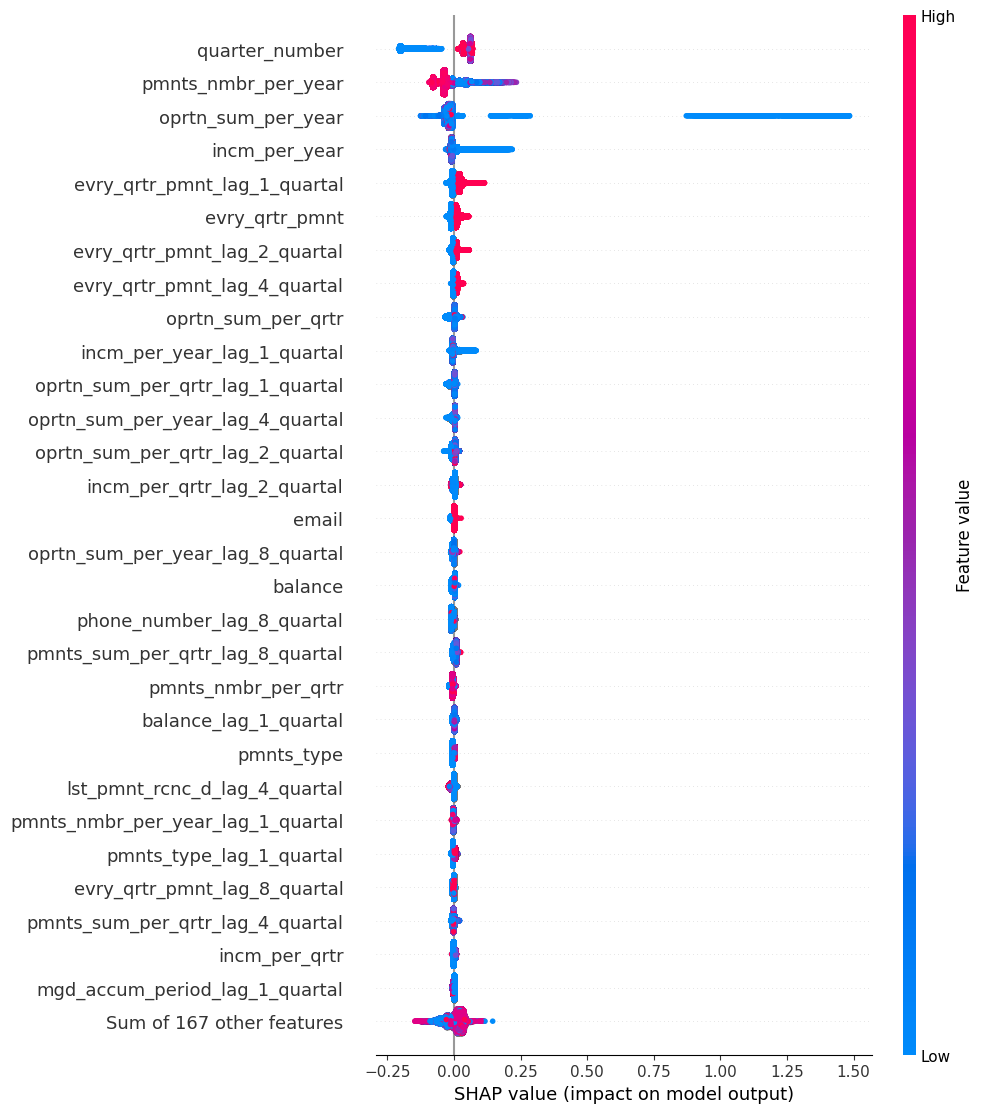

In [ ]:
sample_number = 300_000
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train.tail(sample_number))

shap.plots.beeswarm(shap_values, max_display=30)

In [ ]:
preds = model.predict_proba(X_train.tail(sample_number))[:, 1]

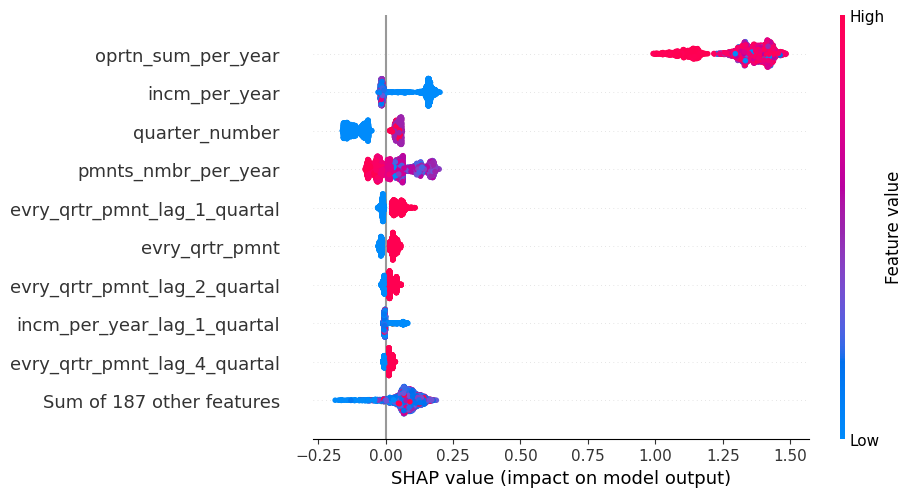

In [ ]:
shap.plots.beeswarm(shap_values[preds > 0.4], max_display=10)

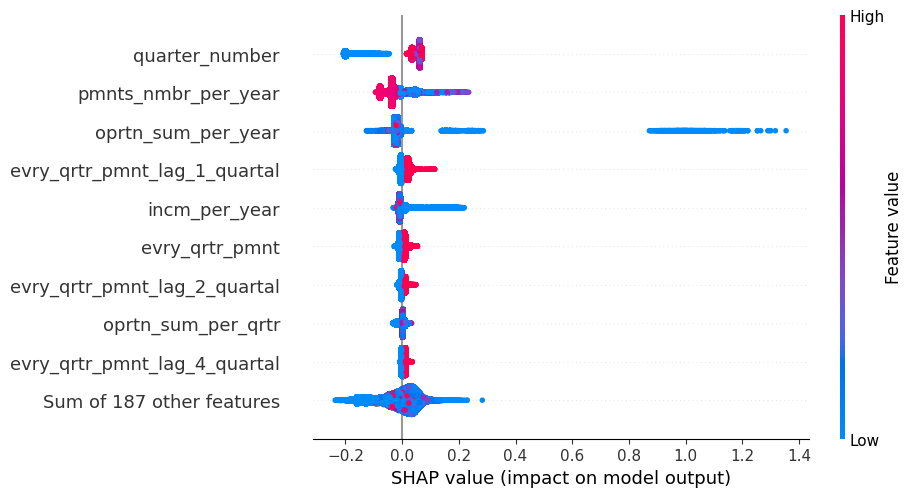

In [ ]:
shap.plots.beeswarm(shap_values[preds < 0.4], max_display=10)

In [ ]:
shap_y = y_train.tail(100_00).reset_index()
shap_y[shap_y['churn'] == 1].iloc[:5]

,index,churn
31,3576685,1.0
69,3576735,1.0
75,3576743,1.0
107,3576789,1.0
143,3576831,1.0


In [ ]:
preds = model.predict(X_train.tail(100_000))

In [ ]:
np.argsort(preds)[-5:], preds[198]

(array([61789, 75418, 99274,  3981, 93924]), 0.0)

In [ ]:
X_train.iloc[107]

npo_accnts_nmbr                    1
pmnts_type                         3
gender                             1
age                               41
clnt_cprtn_time_d               6348
                                ... 
assignee_ops_lag_3_quartal      -1.0
citizen_lag_3_quartal            1.0
fact_addrss_lag_3_quartal        1.0
appl_mrkr_lag_3_quartal          0.0
evry_qrtr_pmnt_lag_3_quartal     0.0
Name: 143, Length: 130, dtype: object